In [2]:
import pandas as pd

In [3]:
df = pd.read_excel('4.1.2.xlsx', sheet_name='data')
df.head()

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,...,Source,GeoInfoUrl,FootNote,Education level,Location,Nature,Quantile,Reporting Type,Sex,Units
0,4,4.1,4.1.2,SE_TOT_CPLR,"Completion rate, by sex, location, wealth quin...",1,World,2000,57.6,2000,...,UNESCO Institute for Statistics. Data extract...,NaN,NaN,LOWSEC,ALLAREA,N,_T,G,FEMALE,PERCENT
1,4,4.1,4.1.2,SE_TOT_CPLR,"Completion rate, by sex, location, wealth quin...",1,World,2000,74.9,2000,...,UNESCO Institute for Statistics. Data extract...,NaN,NaN,PRIMAR,ALLAREA,N,_T,G,FEMALE,PERCENT
2,4,4.1,4.1.2,SE_TOT_CPLR,"Completion rate, by sex, location, wealth quin...",1,World,2000,60.4,2000,...,UNESCO Institute for Statistics. Data extract...,NaN,NaN,LOWSEC,ALLAREA,N,_T,G,BOTHSEX,PERCENT
3,4,4.1,4.1.2,SE_TOT_CPLR,"Completion rate, by sex, location, wealth quin...",1,World,2000,37.5,2000,...,UNESCO Institute for Statistics. Data extract...,NaN,NaN,UPPSEC,ALLAREA,N,_T,G,BOTHSEX,PERCENT
4,4,4.1,4.1.2,SE_TOT_CPLR,"Completion rate, by sex, location, wealth quin...",1,World,2000,39.0,2000,...,UNESCO Institute for Statistics. Data extract...,NaN,NaN,UPPSEC,ALLAREA,N,_T,G,MALE,PERCENT


In [4]:
df= df.drop(['Goal', 'Target', 'Indicator', 'SeriesCode', 'GeoAreaCode', 'SeriesDescription', 'Source', 'Units', 'TimePeriod', 'UpperBound', 'LowerBound', 'BasePeriod', 'GeoInfoUrl', 'FootNote', 'Quantile', 'Reporting Type', 'TimeCoverage', 'Nature'], axis=1)
df.head()


,GeoAreaName,Value,Time_Detail,Education level,Location,Sex
0,World,57.6,2000,LOWSEC,ALLAREA,FEMALE
1,World,74.9,2000,PRIMAR,ALLAREA,FEMALE
2,World,60.4,2000,LOWSEC,ALLAREA,BOTHSEX
3,World,37.5,2000,UPPSEC,ALLAREA,BOTHSEX
4,World,39.0,2000,UPPSEC,ALLAREA,MALE


In [5]:
df_indo= df[df['GeoAreaName'] == 'Indonesia'] 
df_indo.head()

,GeoAreaName,Value,Time_Detail,Education level,Location,Sex
49193,Indonesia,92.22,2000,PRIMAR,ALLAREA,BOTHSEX
49194,Indonesia,57.63,2000,UPPSEC,URBAN,BOTHSEX
49195,Indonesia,66.82,2000,LOWSEC,ALLAREA,MALE
49196,Indonesia,22.43,2000,UPPSEC,RURAL,BOTHSEX
49197,Indonesia,39.81,2000,UPPSEC,ALLAREA,BOTHSEX


In [6]:
df_indo['Education level'].unique()

array(['PRIMAR', 'UPPSEC', 'LOWSEC'], dtype=object)

In [7]:
df_indo['Location'].unique()

array(['ALLAREA', 'URBAN', 'RURAL'], dtype=object)

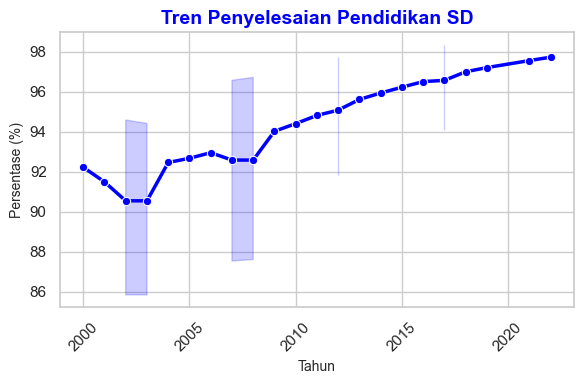

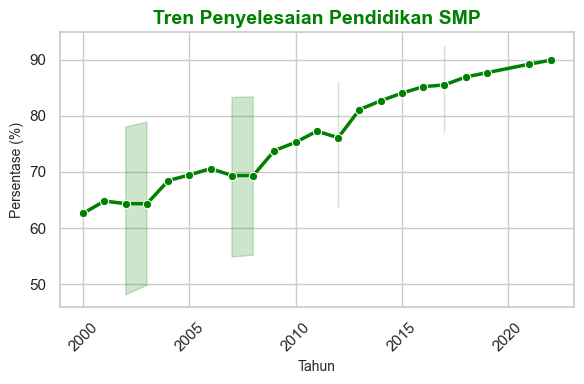

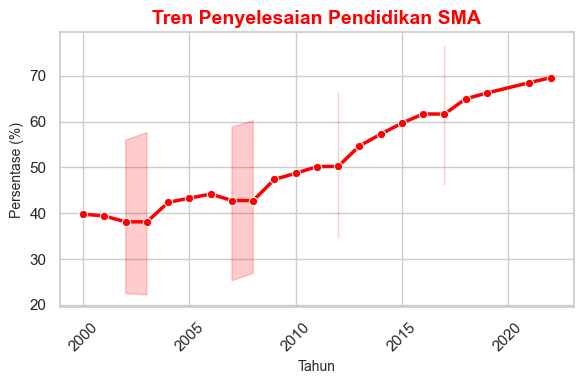

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data hanya untuk BOTHSEX dan ALLAREA
data_filtered = df_indo[
    (df_indo['Sex'] == 'BOTHSEX') &
    (df_indo['Location'] == 'ALLAREA')
]

# Mengecek apakah data yang difilter tidak kosong
if data_filtered.empty:
    print('Data tidak ditemukan untuk BOTHSEX dan ALLAREA.')
else:
    # Set tema yang lebih menarik
    sns.set(style="whitegrid")

    # 1. Plot untuk SD (Primary)
    data_primary = data_filtered[data_filtered['Education level'] == 'PRIMAR']
    
    plt.figure(figsize=(6, 4))
    sns.lineplot(x='Time_Detail', y='Value', data=data_primary, marker='o', color='blue', linewidth=2.5)
    plt.title('Tren Penyelesaian Pendidikan SD', fontsize=14, fontweight='bold', color='blue')
    plt.xlabel('Tahun', fontsize=10)
    plt.ylabel('Persentase (%)', fontsize=10)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 2. Plot untuk SMP (Lowsec)
    data_lowsec = data_filtered[data_filtered['Education level'] == 'LOWSEC']
    
    plt.figure(figsize=(6, 4))
    sns.lineplot(x='Time_Detail', y='Value', data=data_lowsec, marker='o', color='green', linewidth=2.5)
    plt.title('Tren Penyelesaian Pendidikan SMP', fontsize=14, fontweight='bold', color='green')
    plt.xlabel('Tahun', fontsize=10)
    plt.ylabel('Persentase (%)', fontsize=10)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 3. Plot untuk SMA (Uppsec)
    data_uppsec = data_filtered[data_filtered['Education level'] == 'UPPSEC']
    
    plt.figure(figsize=(6, 4))
    sns.lineplot(x='Time_Detail', y='Value', data=data_uppsec, marker='o', color='red', linewidth=2.5)
    plt.title('Tren Penyelesaian Pendidikan SMA', fontsize=14, fontweight='bold', color='red')
    plt.xlabel('Tahun', fontsize=10)
    plt.ylabel('Persentase (%)', fontsize=10)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## Penjelasan
Value dalam dataset tersebut (indikator 4.1.2) merepresentasikan persentase masyarakat Indonesia yang telah menyelesaikan jenjang pendidikan tertentu.

Sebagai contoh:
- Jika value adalah 50 untuk kategori "Male - Urban - Primar" , ini berarti sekitar 505% dari laki-laki Indonesia yang tinggal pada daerah urban telah menyelesaikan pendidikan dasar (primary education).
- Jika value adalah 70 untuk kategori "Female - Rural - Lowsec" , ini berarti sekitar 70% dari perempuan Indonesia yang tinggal pada daerah rural telah menyelesaikan pendidikan wajib bagi usia 12-16 tahun (low-secondary education).